# Enter Student Name & ID

In [1]:
student_id = 99102072   #@param {type:"integer"}
student_name = "Omid Keshavarz" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 99102072
your name: Omid Keshavarz


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [2]:
import numpy as np

In [3]:
def myPCA(X, num_components):
    # Step 1: Mean centering
    X_meaned = X - np.mean(X, axis=0)

    # Step 2: Calculate the covariance matrix
    cov_matrix = np.cov(X_meaned, rowvar=False)

    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Step 4: Sort the eigenvalues and eigenvectors in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Step 5: Select the top 'num_components' eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, :num_components]

    # Step 6: Transform the data
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()

    return X_reduced, sorted_eigenvalues, sorted_eigenvectors

# Example usage:
# X is your data matrix where each row is a sample and each column is a feature
# num_components is the number of principal components you want to keep
# X_reduced, eigenvalues, eigenvectors = myPCA(X, num_components)


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [4]:
import matplotlib as plt
from sklearn.datasets import load_iris

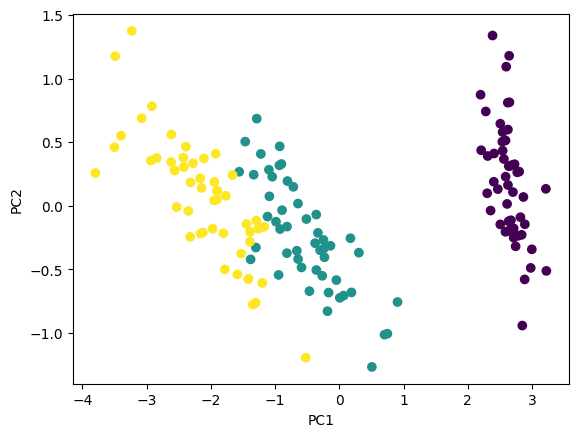

In [5]:
# myPCA on IRIS

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


# Perform PCA on the data
X_reduced, eigenvalues, eigenvectors = myPCA(X, 2)

# Plot the results
plt.pyplot.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.pyplot.xlabel('PC1')
plt.pyplot.ylabel('PC2')
plt.pyplot.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Dimensionality Reduction:

Facial images have high dimensionality (e.g., a 100x100 image has 10,000 dimensions). PCA reduces this high-dimensional data to a lower-dimensional space (e.g., 100 dimensions), making computations more efficient.
Feature Extraction:

Eigenfaces capture the essential features of faces in a lower-dimensional space. These features are useful for tasks like face recognition because they retain the most critical information.
Noise Reduction:

By focusing on the principal components, PCA can filter out noise and redundant information, leading to better performance in recognition tasks.
Facial Recognition:

In facial recognition systems, eigenfaces can be used to represent and compare faces. When a new face is to be recognized, it can be projected onto the eigenface space, and the resulting vector can be compared to the stored vectors of known faces to identify the person.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [6]:
!pip install opencv-python

In [7]:
!mkdir faces

In [8]:
!unzip FacesDataset1.zip -d faces

Archive:  FacesDataset1.zip
   creating: faces/ORL/s1/
  inflating: faces/ORL/s1/1.bmp      
  inflating: faces/ORL/s1/10.bmp     
  inflating: faces/ORL/s1/2.bmp      
  inflating: faces/ORL/s1/3.bmp      
  inflating: faces/ORL/s1/4.bmp      
  inflating: faces/ORL/s1/5.bmp      
  inflating: faces/ORL/s1/6.bmp      
  inflating: faces/ORL/s1/7.bmp      
  inflating: faces/ORL/s1/8.bmp      
  inflating: faces/ORL/s1/9.bmp      
  inflating: faces/ORL/s1/Thumbs.db  
   creating: faces/ORL/s10/
  inflating: faces/ORL/s10/1.bmp     
  inflating: faces/ORL/s10/10.bmp    
  inflating: faces/ORL/s10/2.bmp     
  inflating: faces/ORL/s10/3.bmp     
  inflating: faces/ORL/s10/4.bmp     
  inflating: faces/ORL/s10/5.bmp     
  inflating: faces/ORL/s10/6.bmp     
  inflating: faces/ORL/s10/7.bmp     
  inflating: faces/ORL/s10/8.bmp     
  inflating: faces/ORL/s10/9.bmp     
  inflating: faces/ORL/s10/Thumbs.db  
   creating: faces/ORL/s11/
  inflating: faces/ORL/s11/1.bmp     
  inflating: f

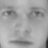

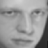

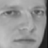

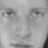

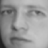

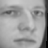

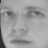

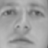

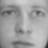

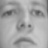

Loaded 10 BMP images.


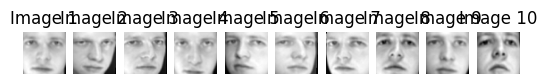

In [10]:
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def read_bmp_images(directory):
    images = []
    for filename in sorted(os.listdir(directory)):
        if filename.endswith(".bmp"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                # Display the image
                cv2_imshow(img)
                cv2.waitKey(500)  # Display each image for 500 ms
            else:
                print(f"Warning: Image {img_path} could not be loaded.")
    cv2.destroyAllWindows()
    return images

# Path to the directory containing BMP images
directory_path = './faces/ORL/s1'

# Check if the directory exists
if not os.path.exists(directory_path):
    print(f"Error: The directory path {directory_path} does not exist.")
else:
    images = read_bmp_images(directory_path)
    print(f"Loaded {len(images)} BMP images.")

    # Optionally, display the images using matplotlib
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Image {i+1}')
        plt.axis('off')
    plt.show()

### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

Training data shape: (200, 2304)
Test data shape: (200, 2304)
Training labels shape: (200,)
Test labels shape: (200,)
Reduced training data shape: (200, 50)
Reduced test data shape: (200, 50)


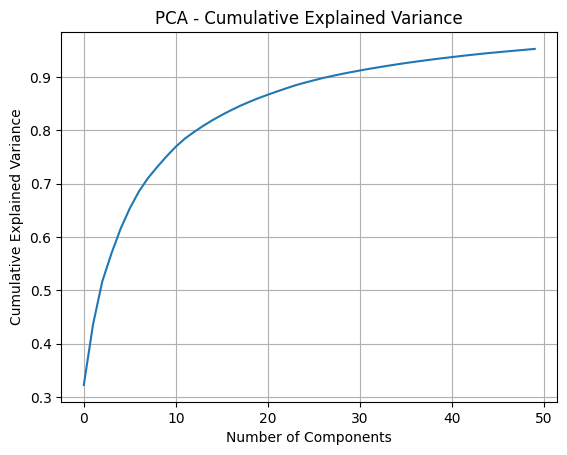

In [14]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the function to read images from the dataset
def load_images_from_folder(folder, label, train_images, train_labels, test_images, test_labels):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".bmp"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
            else:
                print(f"Warning: Image {img_path} could not be loaded.")

    # Check if the correct number of images are loaded
    if len(images) != 10:
        print(f"Warning: Expected 10 images in folder {folder}, but found {len(images)}")

    # Split images into train and test sets (first 5 for train, last 5 for test)
    train_images.extend(images[:5])
    test_images.extend(images[5:])
    train_labels.extend([label] * 5)
    test_labels.extend([label] * 5)

# Initialize lists to hold training and testing data
train_images = []
train_labels = []
test_images = []
test_labels = []

# Path to the dataset
dataset_path = './faces/ORL'  # Update this path

# Check if dataset path is correct
if not os.path.exists(dataset_path):
    print(f"Error: The dataset path {dataset_path} does not exist.")
else:
    # Loop through each folder (each representing an individual)
    for i, folder_name in enumerate(sorted(os.listdir(dataset_path))):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            load_images_from_folder(folder_path, i, train_images, train_labels, test_images, test_labels)
        else:
            print(f"Warning: {folder_path} is not a directory.")

# Convert lists to numpy arrays
if train_images and test_images:
    X_train = np.array(train_images)
    X_test = np.array(train_images)
    y_train = np.array(train_labels)
    y_test = np.array(test_labels)

    # Reshape images (assuming images are of size 64x64)
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    print("Training data shape:", X_train.shape)
    print("Test data shape:", X_test.shape)
    print("Training labels shape:", y_train.shape)
    print("Test labels shape:", y_test.shape)

    # Perform PCA and reduce dimensionality
    num_components = 50
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print("Reduced training data shape:", X_train_pca.shape)
    print("Reduced test data shape:", X_test_pca.shape)

    # Plot cumulative explained variance ratio
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA - Cumulative Explained Variance')
    plt.grid()
    plt.show()

else:
    print("Error: No images were loaded. Please check the dataset path and contents.")


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [19]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the function to read images from the dataset
def load_images_from_folder(folder, label, train_images, train_labels, test_images, test_labels):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".bmp"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
            else:
                print(f"Warning: Image {img_path} could not be loaded.")

    # Check if the correct number of images are loaded
    if len(images) != 10:
        print(f"Warning: Expected 10 images in folder {folder}, but found {len(images)}")

    # Split images into train and test sets (first 5 for train, last 5 for test)
    train_images.extend(images[:5])
    test_images.extend(images[5:])
    train_labels.extend([label] * 5)
    test_labels.extend([label] * 5)

# Initialize lists to hold training and testing data
train_images = []
train_labels = []
test_images = []
test_labels = []

# Path to the dataset
dataset_path = './faces/ORL'  # Update this path

# Check if dataset path is correct
if not os.path.exists(dataset_path):
    print(f"Error: The dataset path {dataset_path} does not exist.")
else:
    # Loop through each folder (each representing an individual)
    for i, folder_name in enumerate(sorted(os.listdir(dataset_path))):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            load_images_from_folder(folder_path, i, train_images, train_labels, test_images, test_labels)
        else:
            print(f"Warning: {folder_path} is not a directory.")

# Convert lists to numpy arrays
if train_images and test_images:
    X_train = np.array(train_images)
    X_test = np.array(test_images)
    y_train = np.array(train_labels)
    y_test = np.array(test_labels)

    # Reshape images (assuming images are of size 64x64)
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)


    # Perform PCA and reduce dimensionality
    num_components = 50
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)





    # Train an LDA classifier on the PCA-transformed data
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_pca, y_train)
    y_pred = lda.predict(X_test_pca)

    # Report the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of LDA classifier on PCA-transformed data:", accuracy)

else:
    print("Error: No images were loaded. Please check the dataset path and contents.")


Accuracy of LDA classifier on PCA-transformed data: 0.92


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Training data shape: (200, 2304)
Test data shape: (200, 2304)
Training labels shape: (200,)
Test labels shape: (200,)
Accuracy of LDA classifier with 100 PCA components: 0.94
Accuracy of LDA classifier with 90 PCA components: 0.93
Accuracy of LDA classifier with 80 PCA components: 0.92
Accuracy of LDA classifier with 70 PCA components: 0.9
Accuracy of LDA classifier with 60 PCA components: 0.915
Accuracy of LDA classifier with 50 PCA components: 0.92
Accuracy of LDA classifier with 40 PCA components: 0.925


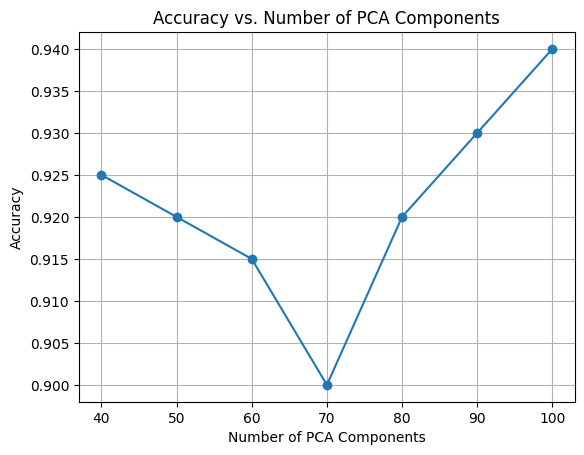

In [20]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the function to read images from the dataset
def load_images_from_folder(folder, label, train_images, train_labels, test_images, test_labels):
    images = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".bmp"):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
            else:
                print(f"Warning: Image {img_path} could not be loaded.")

    # Check if the correct number of images are loaded
    if len(images) != 10:
        print(f"Warning: Expected 10 images in folder {folder}, but found {len(images)}")

    # Split images into train and test sets (first 5 for train, last 5 for test)
    train_images.extend(images[:5])
    test_images.extend(images[5:])
    train_labels.extend([label] * 5)
    test_labels.extend([label] * 5)

# Initialize lists to hold training and testing data
train_images = []
train_labels = []
test_images = []
test_labels = []

# Path to the dataset
dataset_path = './faces/ORL'  # Update this path

# Check if dataset path is correct
if not os.path.exists(dataset_path):
    print(f"Error: The dataset path {dataset_path} does not exist.")
else:
    # Loop through each folder (each representing an individual)
    for i, folder_name in enumerate(sorted(os.listdir(dataset_path))):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            load_images_from_folder(folder_path, i, train_images, train_labels, test_images, test_labels)
        else:
            print(f"Warning: {folder_path} is not a directory.")

# Convert lists to numpy arrays
if train_images and test_images:
    X_train = np.array(train_images)
    X_test = np.array(test_images)
    y_train = np.array(train_labels)
    y_test = np.array(test_labels)

    # Reshape images (assuming images are of size 64x64)
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    print("Training data shape:", X_train.shape)
    print("Test data shape:", X_test.shape)
    print("Training labels shape:", y_train.shape)
    print("Test labels shape:", y_test.shape)

    accuracies = []

    # Perform PCA and LDA for varying number of components
    for num_components in range(100, 39, -10):
        pca = PCA(n_components=num_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train an LDA classifier on the PCA-transformed data
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_pca, y_train)
        y_pred = lda.predict(X_test_pca)

        # Report the accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((num_components, accuracy))
        print(f"Accuracy of LDA classifier with {num_components} PCA components: {accuracy}")

    # Plot accuracies for different numbers of PCA components
    components, acc_values = zip(*accuracies)
    plt.figure()
    plt.plot(components, acc_values, marker='o')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Number of PCA Components')
    plt.grid()
    plt.show()

else:
    print("Error: No images were loaded. Please check the dataset path and contents.")
